In [1]:
import function_sleepWakeLabels as sleep
import pandas as pd
import numpy as np
from scipy.linalg import solve_triangular
import glob
from os.path import join

In [2]:
dat_dir = '/Users/loranknol//HPC_project/data/'

all_files = sorted(glob.glob("sub-*/preproc/*dat-kp.csv", root_dir=dat_dir, recursive=True))
all_files

['sub-3004/preproc/sub-3004_dat-kp.csv',
 'sub-3006/preproc/sub-3006_dat-kp.csv',
 'sub-3009/preproc/sub-3009_dat-kp.csv',
 'sub-3012/preproc/sub-3012_dat-kp.csv',
 'sub-3014/preproc/sub-3014_dat-kp.csv',
 'sub-3016/preproc/sub-3016_dat-kp.csv',
 'sub-3018/preproc/sub-3018_dat-kp.csv',
 'sub-3022/preproc/sub-3022_dat-kp.csv',
 'sub-3023/preproc/sub-3023_dat-kp.csv',
 'sub-3024/preproc/sub-3024_dat-kp.csv',
 'sub-3025/preproc/sub-3025_dat-kp.csv',
 'sub-3029/preproc/sub-3029_dat-kp.csv',
 'sub-3030/preproc/sub-3030_dat-kp.csv',
 'sub-3032/preproc/sub-3032_dat-kp.csv',
 'sub-3033/preproc/sub-3033_dat-kp.csv',
 'sub-3034/preproc/sub-3034_dat-kp.csv',
 'sub-3037/preproc/sub-3037_dat-kp.csv',
 'sub-3038/preproc/sub-3038_dat-kp.csv',
 'sub-3042/preproc/sub-3042_dat-kp.csv',
 'sub-3043/preproc/sub-3043_dat-kp.csv',
 'sub-3044/preproc/sub-3044_dat-kp.csv',
 'sub-3046/preproc/sub-3046_dat-kp.csv',
 'sub-3047/preproc/sub-3047_dat-kp.csv',
 'sub-3049/preproc/sub-3049_dat-kp.csv',
 'sub-3050/prepr

/Users/loranknol/Documents/Code/graph-svd/function_sleepWakeLabels.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  M = df.groupby(['dayNumber','hour'],as_index = False).size().pivot('dayNumber','hour').fillna(0)
/Users/loranknol/Documents/Code/graph-svd/function_sleepWakeLabels.py:106: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  speedM=df.groupby(['dayNumber','hour'],as_index = False).apply(lambda x: medianAAIKD(x)).pivot('dayNumber','hour')


C: (4320, 4320), D: (4320, 4320), X: (2, 4320), Y: (2, 4320), E: (2, 2), E_tilde: (2, 1)


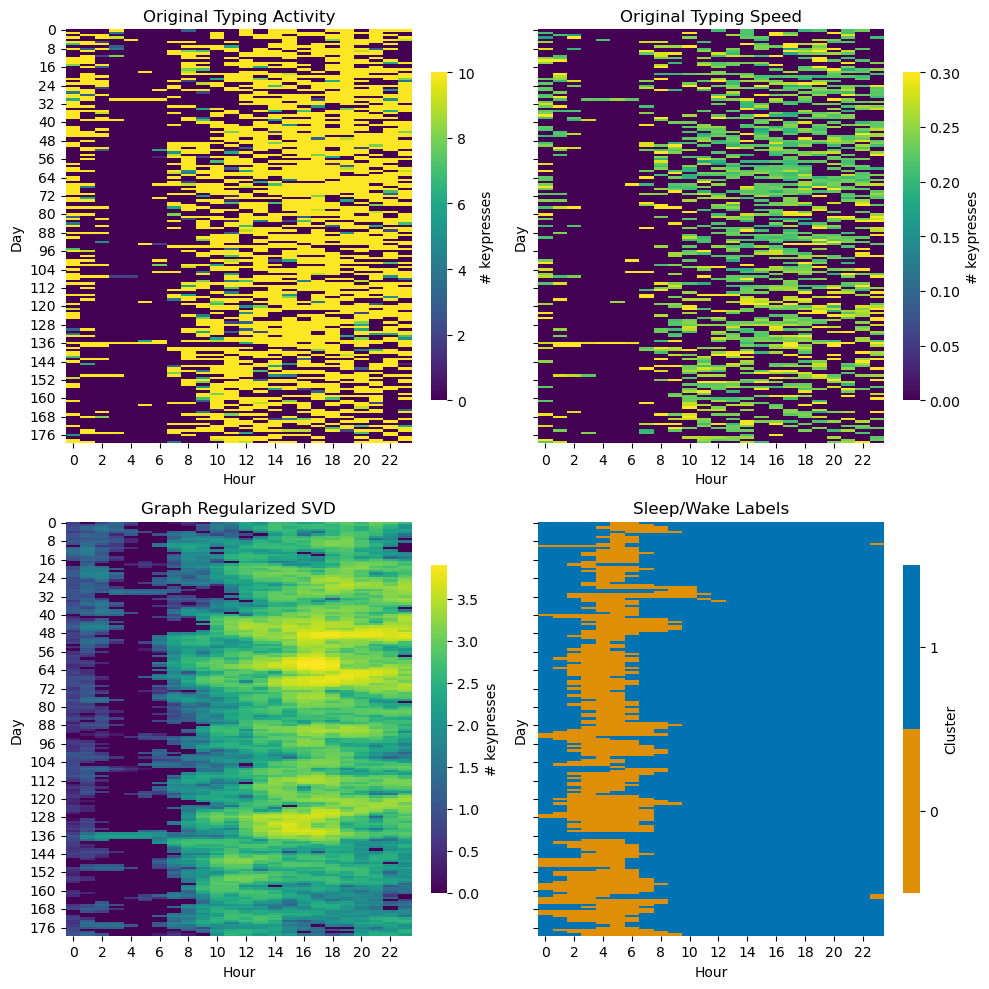

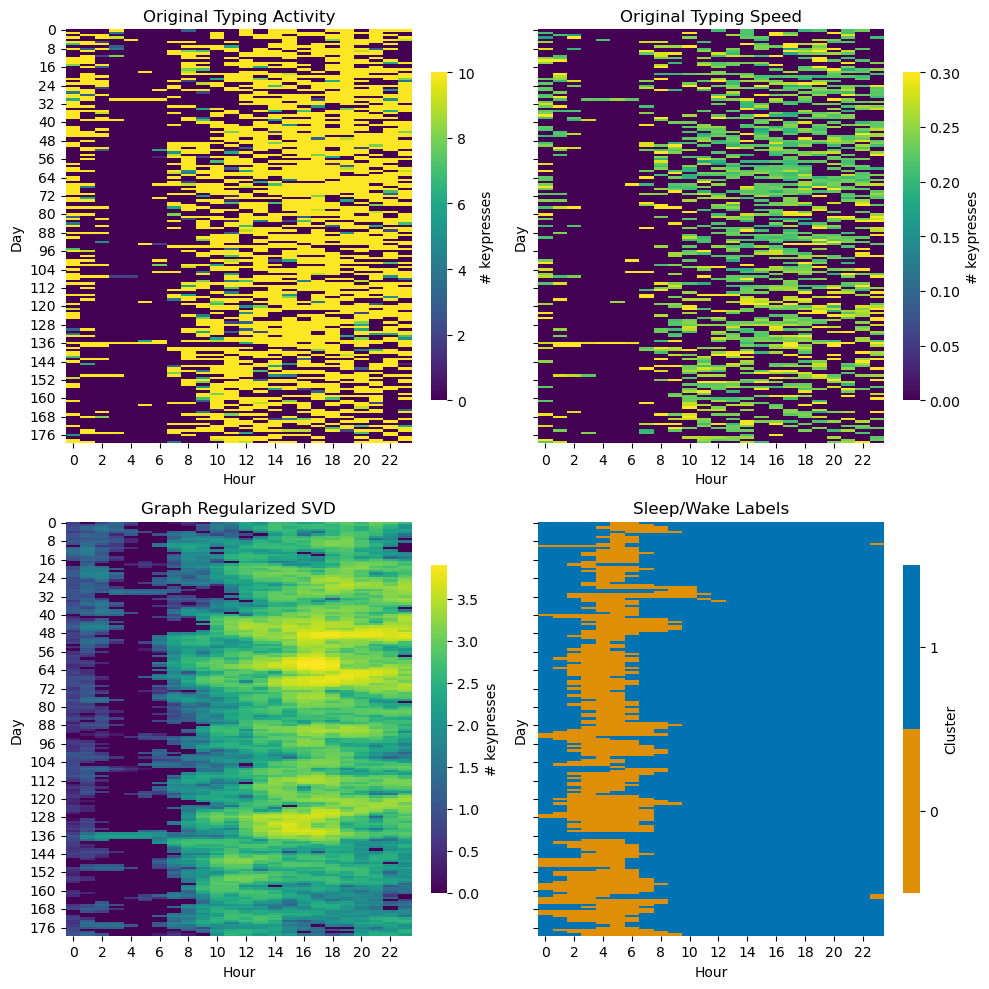

In [4]:
# read in keypress file
dfKP = pd.read_csv(join(dat_dir, all_files[2]), index_col=0)
dfKP['dayNumber'] = pd.to_datetime(dfKP['keypressTimestampLocal']) \
    .map(lambda x: x.date()) \
    .rank(method='dense')

################################################################
# FIND SLEEP/WAKE LABELS FROM BIAFFECT KEYPRESS DATA FILE
################################################################
# STEP 1
# get input matrices of shape days x hours for typing activity (nKP) and speed (median IKD)
## matrices may have missing days
## check index here to identify day number since first date of typing data
Mactivity, Mspeed = sleep.get_typingMatrices(dfKP)

# STEP 2
# get graph regularized SVD
svd = sleep.get_SVD(Mactivity, Mspeed)

# STEP 3
# get sleep/wake labels by hour
sleepMatrix = sleep.get_sleepWakeLabels(svd)

# Plot steps if desired
sleep.plot_heatmaps(Mactivity, Mspeed, svd, sleepMatrix)

In [5]:
C = np.array([[4, 12, -16], 
              [12, 37, -43],
              [-16, -43, 98]])
D = np.linalg.cholesky(C)
D_t_inv = np.linalg.inv(D.T)

X = C

X @ D_t_inv

array([[ 2.0000000e+00,  0.0000000e+00,  8.8817842e-16],
       [ 6.0000000e+00,  1.0000000e+00,  6.7168493e-15],
       [-8.0000000e+00,  5.0000000e+00,  3.0000000e+00]])

In [6]:
solve_triangular(D, X.T, lower=True).T

array([[ 2.,  0.,  0.],
       [ 6.,  1.,  0.],
       [-8.,  5.,  3.]])